In [3]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [7]:
# Lendo os dados
Base_Dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [8]:
# Nulos
Base_Dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<Axes: title={'center': 'Análise de campos nulos'}>

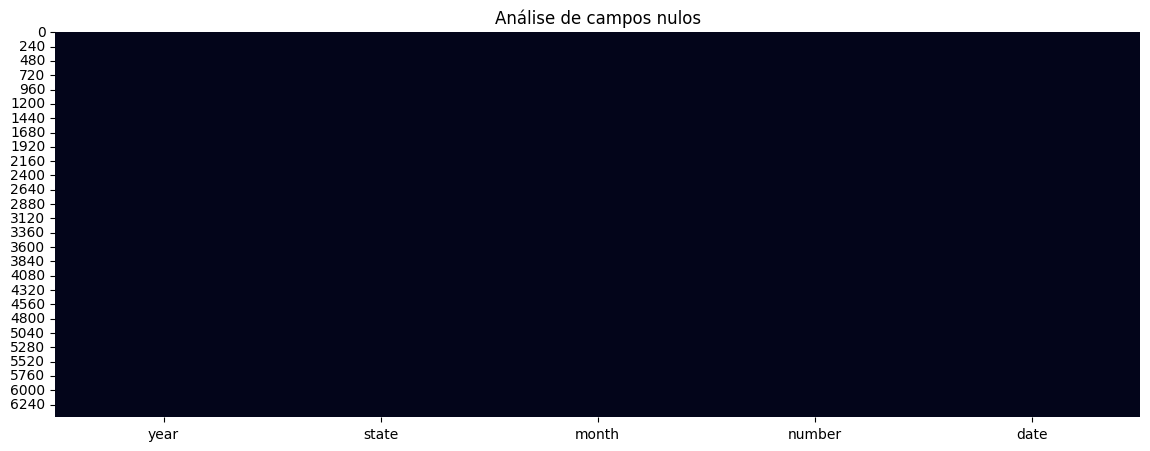

In [9]:
# Nulos Plot
plt.figure(figsize=(14,5))
plt.title('Análise de campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False)

In [10]:
# Analisando as informações estatísticas
Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [11]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [13]:
# Campos Únicos
Base_Dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

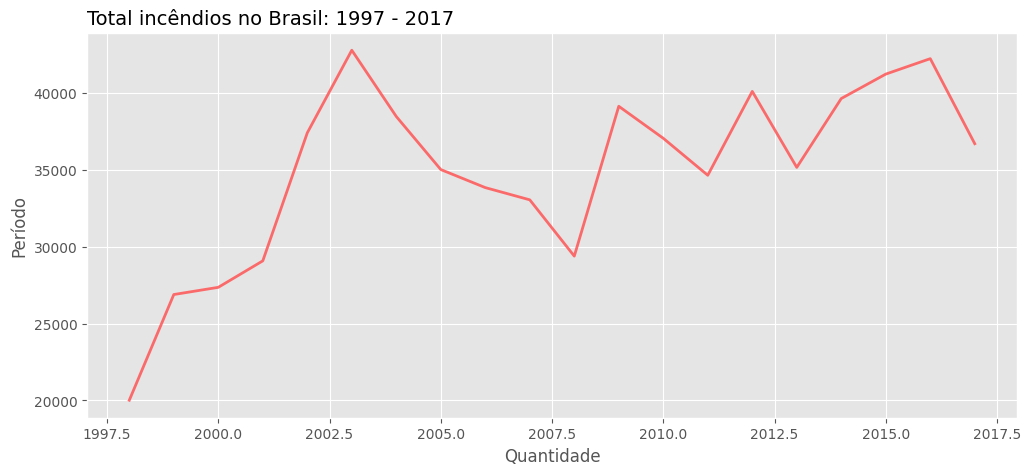

In [17]:
# Análise de incêndios por ano
Analise = Base_Dados.groupby(by=['year']).sum().reset_index()

Analise.head()

# Tamanho
plt.figure(figsize=(12,5))

# Style
plt.style.use('ggplot')

# Grafico
plt.title('Total incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

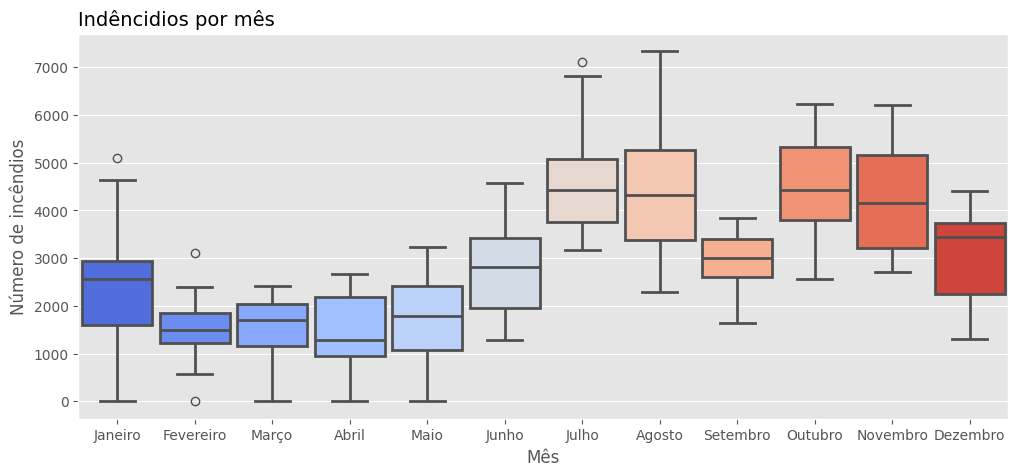

In [22]:
# Análise de incêndios por ano
Analise_02 = Base_Dados.groupby(by=['year', 'month']).sum().reset_index()

Analise_02.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Gráfico
plt.title( 'Indêncidios por mês', loc='left', fontsize=14 )
sns.boxplot( data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
          order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

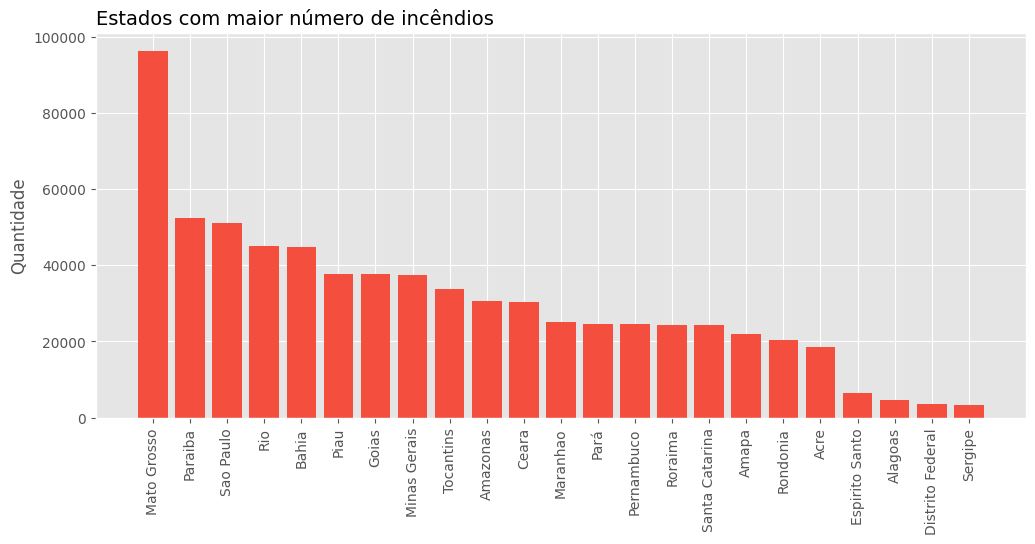

In [23]:
# Análise por ano dos incendios
Analise_03 = Base_Dados.groupby(by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False)
Analise_03.head()

# Tamanho
plt.figure(figsize=(12, 5))

# Grafico
plt.title('Estados com maior número de incêndios', loc='left', fontsize=14)

# Grafico
plt.bar(Analise_03.state, Analise_03['number'], color='#f44e3f')

# Labels
plt.ylabel('Quantidade')
plt.xticks(rotation=90);

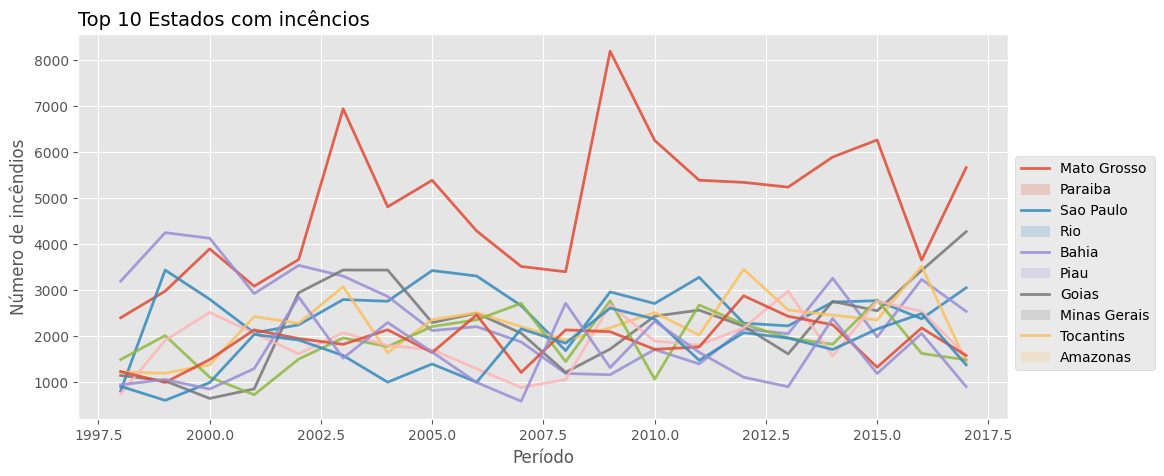

In [28]:
# Estados TOP 10
Lista_TOP10 = Analise_03['state'][0:10].values

# Tamanho
plt.figure(figsize=(12, 5))

# Grafico
plt.title('Top 10 Estados com incêncios', loc='left', fontsize=14)

# Loop
for Coluna in Lista_TOP10:

  # Filtrar o estado
  Filtro = Base_Dados.loc[Base_Dados['state'] == Coluna]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby(by=['year']).sum().reset_index()

  # Plot
  sns.lineplot(data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

# Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios')

# Legenda
plt.legend(Lista_TOP10, bbox_to_anchor=(1, 0.7));

In [29]:
# Plot Geográfico

# Gerando os estados
Estados = Analise_03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [-8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25]

# Longitudes
Log = [-70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame(Dicionario)

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [30]:
# Fazendo o plot
import plotly.express as px

# Mapa de Calor Geografico (Gráfico)
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)

In [43]:
import matplotlib.image as mpimg

fig = plt.figure(figsize=(18, 15)) # initialize figure

ax = [None for _ in range(6)] # list to save many ax for setting parameter in each

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=2)
plt.style.use('seaborn-darkgrid')
# Titulo
plt.title('Total Incêndios no Brasil: 1998 - 2017', loc='left', fontsize=14)

# Grafico
sns.lineplot( x='year', y='number', data=Analise, estimator = 'sum', color='#FF5555', lw=2, err_style=None , alpha=0.85)

# Label
plt.xlabel('Período', fontsize=10)
plt.ylabel('Quantidade', fontsize=10);

ax[1] = plt.subplot2grid((3,4), (0,2), colspan=2)

# Estilo
plt.style.use('seaborn-darkgrid')

# Titulo
plt.title('Incêndios por Mês', loc='left', fontsize=14)

# Grafico
sns.boxplot(x='month', y='number', data=Analise, palette="coolwarm", saturation=1, width=0.9, fliersize=4, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Label
plt.xlabel('Mês')
plt.ylabel('Número de incêndios');

ax[2] = plt.subplot2grid((3,4), (1,0), colspan=2)

# Titulo
plt.title('Estados com maior índice de Incêndios', loc='left', fontsize=14)

# Grafico
plt.bar( Analise_Estado.index, Analise_Estado, color='#f44e3f')

# Label
plt.ylabel('Quantidade')
plt.xticks( rotation=90, fontsize=8)

ax[3] = plt.subplot2grid((3,4), (1,2), colspan=2)

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')

# Paleta de Core
Paleta_Cores = sns.color_palette('inferno', 12)

# Titulo
plt.title('Top 10 estados com maior Incêndios', loc='left', fontsize=14, fontweight=0 )

# Plot de todas as colunas
for Posicao, Coluna in enumerate(Analise_Estado[0:10].index):

  # Filtro Local
  Filtro = Analise.loc[ Analise['state'] == Coluna ]

  # Plot dos estados
  sns.lineplot( x='year', y='number', data=Filtro, estimator = 'sum', color=Paleta_Cores[Posicao], lw=2, err_style=None , alpha=0.85)

# Labels
plt.xlabel(' ')
plt.ylabel('Quantidade de Incêndios');

plt.legend( Analise_Estado[0:10].index, fontsize=8, ncol=5, loc='center',
           bbox_to_anchor=(0.5, -0.15), shadow=True );

ax[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
Buraco_Negro = mpimg.imread('5.PNG')
plt.imshow(Buraco_Negro)
plt.axis('off')
plt.title('Visão Geográfica dos Incêndios', loc='left', fontsize=14, fontweight=0)

fig.tight_layout()

# Incluindo o Titulo na Figura
plt.suptitle(f'Análise Incêndios Florestais no Brasil', fontsize=22, color='#404040', fontfamily='KyivType Sans', fontweight=600)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.35, hspace=0.35)

# Rodapé
Rodape = '''
Essse relatório foi elaborado no treinado "Python para Análise de Dados"
Está dispónivel no canal do youtube @Data Viking
by: @Odemir Depieri Jr - @Ronisson Lucas Calmon da Conceição
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, 0.01, Rodape, ha='center', va='bottom', size=14, color='#938ca1');

plt.show()